In [3]:
import scipy.io
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path
import glob
from math import floor
import math
import sys
from scipy import stats
import random
from scipy.interpolate import make_interp_spline, BSpline
import random

sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers/")
from utils import resample_stages, perform_baseline
from plots import plot_event_related_lines

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# ALL STIMS 

In [18]:
DumN = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/NDum_erp_final.mat')
DumN1 = DumN['NDum_erp2']
StmN = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/Nstim_erp_final.mat')
StmN1 = StmN['Nstim_erp2']
DumR = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/RDum_erp_final.mat')
DumR1 = DumR['RDum_erp2']
StmR = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/Rstim_erp_final.mat')
StmR1 = StmR['Rstim_erp2']

time = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/times_StimNoStim.mat')
times=np.squeeze(time['times'])

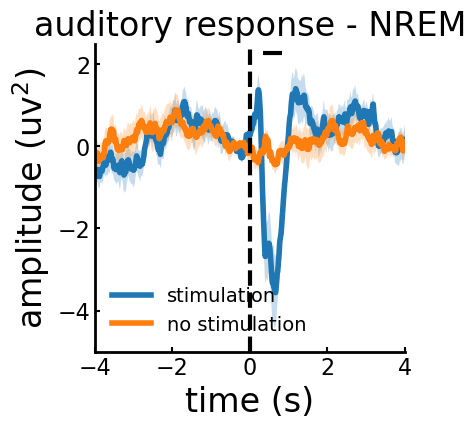

In [19]:
# adjust
AllSm = np.nanmean(StmN1,axis=0)
AllSs = stats.sem(StmN1,0, nan_policy = 'omit')

AllDm = np.nanmean(DumN1,axis=0)
AllDs = stats.sem(DumN1,0, nan_policy = 'omit')

plt.figure(figsize=(4,4))  

plt.plot(times, AllSm ,color='tab:blue',linestyle='-',linewidth=4, label = 'stimulation')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='tab:orange',linestyle='-',linewidth=4, label = 'no stimulation')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.title("auditory response - NREM", fontsize = 24)

# significance
plt.hlines(y = 2.27, xmin = times[1087], xmax = times[1208], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-5,2.5)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/ERP_Stims_all_NREM_16.svg", dpi = 600)

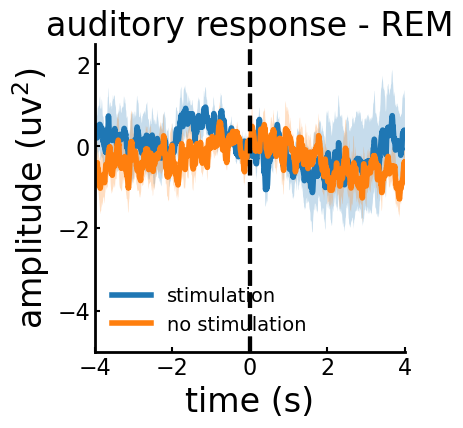

In [20]:
# adjust
AllSm = np.nanmean(StmR1,axis=0)
AllSs = stats.sem(StmR1,0, nan_policy = 'omit')

AllDm = np.nanmean(DumR1,axis=0)
AllDs = stats.sem(DumR1,0, nan_policy = 'omit')

plt.figure(figsize=(4,4))  

plt.plot(times, AllSm ,color='tab:blue',linestyle='-',linewidth=4, label = 'stimulation')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='tab:orange',linestyle='-',linewidth=4, label = 'no stimulation')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 2.27, xmin = times[1087], xmax = times[1208], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-5,2.5)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/ERP_Stims_all_REM_16.svg", dpi = 600)

# KC vs No KC

In [22]:
KC = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/KC_erp.mat')
KC1 = KC['KC_erp']

noKC = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/NKC_erp.mat')
noKC1 = noKC['NKC_erp']

time = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/time_128.mat')
times=np.squeeze(time['time_128'])

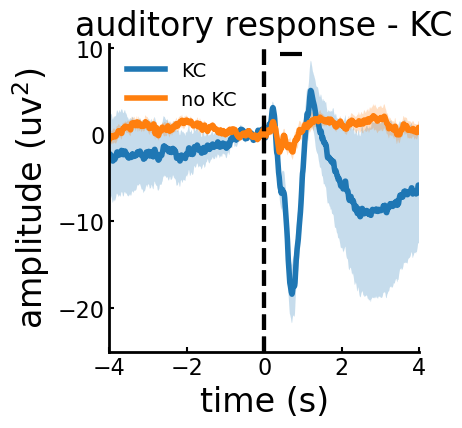

In [23]:
# adjust
AllSm = np.nanmean(KC1,axis=0)
AllSs = stats.sem(KC1,0, nan_policy = 'omit')

AllDm = np.nanmean(noKC1,axis=0)
AllDs = stats.sem(noKC1,0, nan_policy = 'omit')

plt.figure(figsize=(4,4))  

plt.plot(times, AllSm ,color='tab:blue',linestyle='-',linewidth=4, label = 'KC')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='tab:blue', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='tab:orange',linestyle='-',linewidth=4, label = 'no KC')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='tab:orange', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("auditory response - KC", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
plt.hlines(y = 9.27, xmin = times[565], xmax = times[636], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-25,10.5)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/ERP_KC_all.svg", dpi = 600)

# VOICES AND NAMES

In [24]:
FVN = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/FVN_erp.mat')
FVN1 = FVN['FVN_erp']

UFVN = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/UFVN_erp.mat')
UFVN1 = UFVN['UFVN_erp']

FVR = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/FVR_erp.mat')
FVR1 = FVR['FVR_erp']

UFVR = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/UFVR_erp.mat')
UFVR1 = UFVR['UFVR_erp']

##################
SONN = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/SONN_erp.mat')
SONN1 = SONN['SONN_erp']

UNN = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/UNN_erp.mat')
UNN1 = UNN['UNN_erp']

SONR = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/SONR_erp.mat')
SONR1 = SONR['SONR_erp']

UNR = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/UNR_erp.mat')
UNR1 = UNR['UNR_erp']

time = scipy.io.loadmat('/home/b1044271/Columbia/Results/Evoked/times_StimNoStim.mat')
times=np.squeeze(time['times'])

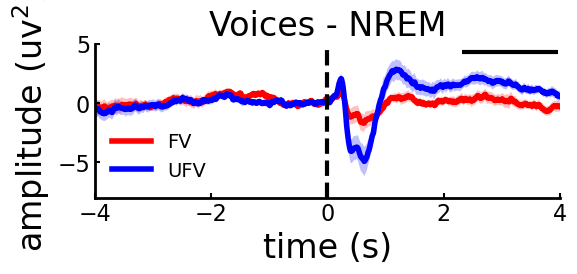

In [27]:
# adjust
AllSm = np.nanmean(FVN1,axis=0)
AllSs = stats.sem(FVN1,0, nan_policy = 'omit')

AllDm = np.nanmean(UFVN1,axis=0)
AllDs = stats.sem(UFVN1,0, nan_policy = 'omit')

plt.figure(figsize=(6,2))  

plt.plot(times, AllSm ,color='red',linestyle='-',linewidth=4, label = 'FV')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='red', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='blue',linestyle='-',linewidth=4, label = 'UFV')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='blue', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Voices - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
plt.hlines(y = 4.27, xmin = times[1580], xmax = times[1990], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-8,5)
plt.xlabel("time (s)", fontsize = 24)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/ERP_Voice_NREM.svg", dpi = 600)

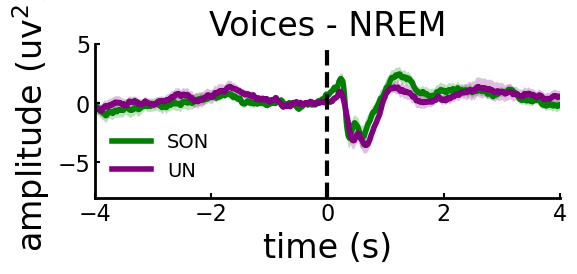

In [28]:
# adjust
AllSm = np.nanmean(SONN1,axis=0)
AllSs = stats.sem(SONN1,0, nan_policy = 'omit')

AllDm = np.nanmean(UNN1,axis=0)
AllDs = stats.sem(UNN1,0, nan_policy = 'omit')

plt.figure(figsize=(6,2))  

plt.plot(times, AllSm ,color='green',linestyle='-',linewidth=4, label = 'SON')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='green', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='purple',linestyle='-',linewidth=4, label = 'UN')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='purple', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Voices - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 9.27, xmin = times[565], xmax = times[636], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-8,5)
plt.xlabel("time (s)", fontsize = 24)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)

ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/ERP_Name_NREM.svg", dpi = 600)

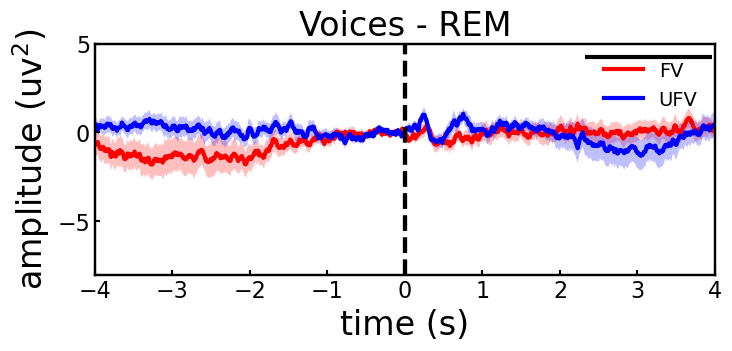

In [68]:
# adjust
AllSm = np.nanmean(FVR1,axis=0)
AllSs = stats.sem(FVR1,0, nan_policy = 'omit')

AllDm = np.nanmean(UFVR1,axis=0)
AllDs = stats.sem(UFVR1,0, nan_policy = 'omit')

plt.figure(figsize=(8,3))  

plt.plot(times, AllSm ,color='red',linestyle='-',linewidth=3, label = 'FV')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='red', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='blue',linestyle='-',linewidth=3, label = 'UFV')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='blue', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Voices - REM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 4.27, xmin = times[1580], xmax = times[1990], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-8,5)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/ERP_Voice_REM.svg", dpi = 600)

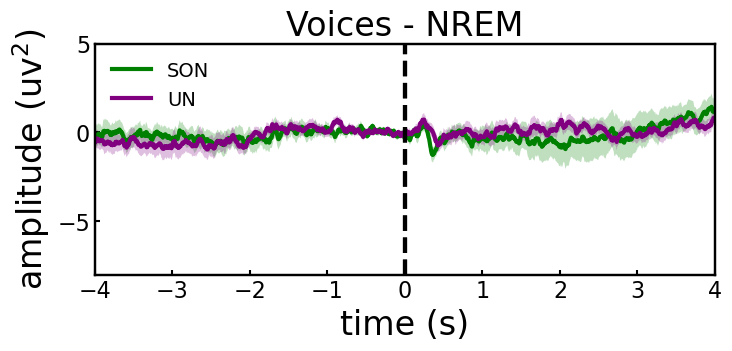

In [69]:
# adjust
AllSm = np.nanmean(SONR1,axis=0)
AllSs = stats.sem(SONR1,0, nan_policy = 'omit')

AllDm = np.nanmean(UNR1,axis=0)
AllDs = stats.sem(UNR1,0, nan_policy = 'omit')

plt.figure(figsize=(8,3))  

plt.plot(times, AllSm ,color='green',linestyle='-',linewidth=3, label = 'SON')
plt.fill_between(times,AllSm -AllSs, AllSm+AllSs,facecolor='green', alpha=0.25)
plt.legend(prop={'size': 14}, frameon=False)

plt.plot(times, AllDm ,color='purple',linestyle='-',linewidth=3, label = 'UN')
plt.fill_between(times,AllDm - AllDs, AllDm + AllDs,facecolor='purple', alpha=0.25)

plt.legend(prop={'size': 14}, frameon=False)
plt.title("Voices - NREM", fontsize = 24)
plt.axvline(x = 0, color = 'k', linestyle = '--', linewidth =3)

# significance
#plt.hlines(y = 9.27, xmin = times[565], xmax = times[636], color='k',linestyle='-',linewidth=3)

plt.xlim(-4,4)
plt.ylim(-8,5)
plt.xlabel("time (s)", fontsize = 24)

plt.axvline(x= 0, color='k',linestyle='--',linewidth=3)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('amplitude (uv$^2$)', fontsize=24)



ax = plt.gca()
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)
ax.spines['right'].set_linewidth(1.75)
ax.spines['top'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/NOV23/ERP_Name_REM.svg", dpi = 600)